<h1>MIDTERM EXAM: CHICAGO CRIME</h1>
<h2>ANALYST: ANNE FEDELINO</h2>

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [40]:
chicago = pd.read_csv('datasets/Chicago_Crimes.csv')

In [41]:
chicago

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [42]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    249123 non-null  int64  
 1   Case Number           249123 non-null  object 
 2   Date                  249123 non-null  object 
 3   Block                 249123 non-null  object 
 4   IUCR                  249123 non-null  object 
 5   Primary Type          249123 non-null  object 
 6   Description           249123 non-null  object 
 7   Location Description  248266 non-null  object 
 8   Arrest                249123 non-null  bool   
 9   Domestic              249123 non-null  bool   
 10  Beat                  249123 non-null  int64  
 11  District              249123 non-null  int64  
 12  Ward                  249123 non-null  int64  
 13  Community Area        249120 non-null  float64
 14  FBI Code              249123 non-null  object 
 15  

In [43]:
chicago.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.491230e+05,249123.000000,249123.000000,249123.000000,249120.000000,2.490330e+05,2.490330e+05,249123.000000,249033.000000,249033.000000
mean,1.358652e+07,1153.845634,11.308924,23.186823,36.238560,1.165309e+06,1.887602e+06,2024.241668,41.847162,-87.668845
std,6.473192e+05,707.959752,7.074807,13.925951,21.567485,1.616814e+04,3.146277e+04,0.428095,0.086517,0.058875
min,2.807300e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567
25%,1.352322e+07,533.000000,5.000000,10.000000,22.000000,1.153981e+06,1.860560e+06,2024.000000,41.772706,-87.710071
50%,1.361560e+07,1034.000000,10.000000,23.000000,32.000000,1.167190e+06,1.894278e+06,2024.000000,41.865616,-87.661690
75%,1.370865e+07,1732.000000,17.000000,34.000000,53.000000,1.176662e+06,1.910282e+06,2024.000000,41.909711,-87.627233
max,1.381045e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531


In [44]:
chicago.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

<h2>FILLING NULL VALUES & MISSING VALUES</h2>

In [45]:
chicago['Location Description'] = chicago['Location Description'].fillna(chicago['Location Description'].mean)
chicago['Community Area'] = chicago['Community Area'].fillna(chicago['Community Area'].mean)
chicago['X Coordinate'] = chicago['X Coordinate'].fillna(chicago['X Coordinate'].mean)
chicago['Y Coordinate'] = chicago['Y Coordinate'].fillna(chicago['Y Coordinate'].mean)
chicago['Latitude'] = chicago['Latitude'].fillna(chicago['Latitude'].mean)
chicago['Longitude'] = chicago['Longitude'].fillna(chicago['Longitude'].mean)
chicago['Location'] = chicago['Location'].fillna(chicago['Location'].mean)

In [46]:
chicago.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [47]:
chicago.dtypes

ID                       int64
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                    bool
Domestic                  bool
Beat                     int64
District                 int64
Ward                     int64
Community Area          object
FBI Code                object
X Coordinate            object
Y Coordinate            object
Year                     int64
Updated On              object
Latitude                object
Longitude               object
Location                object
dtype: object

<h2>ADJUSTING DATA TYPES</h2>

In [48]:
chicago['ID'] = pd.to_numeric(chicago['ID'], errors='coerce').astype('Int64')
chicago['Case Number'] = chicago['Case Number'].astype('string')
chicago['Date'] = chicago['Date'].astype('str').str.replace('/', '-')
chicago['Date'] = pd.to_datetime(chicago['Date'], dayfirst=True, errors='coerce')
chicago['Block'] = chicago['Block'].astype('string')
chicago['IUCR'] = chicago['IUCR'].astype('string')
chicago['Primary Type'] = chicago['Primary Type'].astype('string')
chicago['Description'] = chicago['Description'].astype('string')
chicago['Location Description'] = chicago['Location Description'].astype('string')
chicago['Arrest'] = chicago['Arrest'].astype('bool')
chicago['Domestic'] = chicago['Domestic'].astype('bool')
chicago['Beat'] = pd.to_numeric(chicago['Beat'], errors='coerce').astype('Int64')
chicago['District'] = pd.to_numeric(chicago['District'], errors='coerce').astype('Int64')
chicago['Ward'] = pd.to_numeric(chicago['Ward'], errors='coerce').astype('Int64')
chicago['Community Area'] = pd.to_numeric(chicago['Community Area'], errors='coerce').astype('Int64')
chicago['FBI Code'] = chicago['FBI Code'].astype('string')
chicago['X Coordinate'] = pd.to_numeric(chicago['X Coordinate'], errors='coerce')
chicago['Y Coordinate'] = pd.to_numeric(chicago['Y Coordinate'], errors='coerce')
chicago['Latitude'] = pd.to_numeric(chicago['Latitude'], errors='coerce')
chicago['Longitude'] = pd.to_numeric(chicago['Longitude'], errors='coerce')
chicago['Year'] = pd.to_numeric(chicago['Year'], errors='coerce').astype('Int64')
chicago['Updated On'] = pd.to_datetime(chicago['Updated On'], dayfirst=True, errors='coerce')
chicago['Location'] = chicago['Location'].astype('string')


In [49]:
chicago.dtypes

ID                               Int64
Case Number             string[python]
Date                    datetime64[ns]
Block                   string[python]
IUCR                    string[python]
Primary Type            string[python]
Description             string[python]
Location Description    string[python]
Arrest                            bool
Domestic                          bool
Beat                             Int64
District                         Int64
Ward                             Int64
Community Area                   Int64
FBI Code                string[python]
X Coordinate                   float64
Y Coordinate                   float64
Year                             Int64
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                string[python]
dtype: object

<h2>EXTRACTING DATE INFORMATION USING PANDAS DATE TIME</h2>

In [50]:
chicago['Date'] = pd.to_datetime(chicago['Date'], errors='coerce')

chicago['Year'] = chicago['Date'].dt.year
chicago['Month'] = chicago['Date'].dt.month
chicago['Day'] = chicago['Date'].dt.day
chicago['DayOfWeek'] = chicago['Date'].dt.day_name()
chicago['Hour'] = chicago['Date'].dt.hour

chicago[['Date', 'Year', 'Month', 'Day', 'DayOfWeek', 'Hour']].head()

,Date,Year,Month,Day,DayOfWeek,Hour
0,2024-04-14,2024,4,14,Sunday,0
1,2024-04-14,2024,4,14,Sunday,0
2,2024-04-14,2024,4,14,Sunday,0
3,2024-04-14,2024,4,14,Sunday,0
4,2024-04-14,2024,4,14,Sunday,0


<h1>DATA ANALYSIS</h1>

<h2>1. Crime type occurs most frequently in Chicago according to the dataset</h2>

In [51]:
chicago['Primary Type'].value_counts()

Primary Type
THEFT                                59201
BATTERY                              44579
CRIMINAL DAMAGE                      27094
ASSAULT                              22615
MOTOR VEHICLE THEFT                  19604
OTHER OFFENSE                        16781
DECEPTIVE PRACTICE                   14991
BURGLARY                              8443
ROBBERY                               8200
WEAPONS VIOLATION                     7164
NARCOTICS                             6627
CRIMINAL TRESPASS                     5045
OFFENSE INVOLVING CHILDREN            1597
CRIMINAL SEXUAL ASSAULT               1573
SEX OFFENSE                           1210
PUBLIC PEACE VIOLATION                1006
INTERFERENCE WITH PUBLIC OFFICER       771
HOMICIDE                               553
STALKING                               520
ARSON                                  452
PROSTITUTION                           287
CONCEALED CARRY LICENSE VIOLATION      249
LIQUOR LAW VIOLATION                   19

<h3>INSIGHT 1:</h3>
The dataset records 31 unique categories of primary crime types, showing the broad diversity of criminal activities in the city.

The result shows the highest to lowest number of crimes that are common in chiocago. The crimes like THEFT, BATTERY, and ASSAULT appear at the top, suggesting these are the most prevalent in daily life.

<h2>2. What is the number of arrests in the location description "STREET"?</h2>

In [52]:
chicago[chicago["Location Description"] == "STREET"]["Arrest"].value_counts()

Arrest
False    55415
True     10625
Name: count, dtype: int64

<h3>INSIGHT 2:</h3>
The data shows that the majority of incidents labeled under "STREET" have Arrest = False. This means suspects are often not apprehended on the spot, suggesting challenges in catching offenders in open and public spaces.

<h2>3. What District has fewer reported crimes?</h2>

In [53]:
chicago['District'].value_counts()

District
8     16691
12    15355
1     14409
6     14157
19    13640
11    13423
4     13318
18    13118
2     12848
25    12664
3     12545
9     10910
7     10520
10    10133
5      9883
14     9341
15     8605
16     8570
24     8101
17     7801
22     7710
20     5362
31       19
Name: count, dtype: Int64

<h3>INSIGHT 3:</h3>
District 8 has the most reported crimes 16,691 cases. Other high-crime districts include 12 = 15,355, 6 = 14,157, 1 = 14,409, and 19 =13,640. District 31 shows only 19 cases, which likely indicates a data entry issue or a non-active district code.

<h2>4. Which crime type occurs least frequently in Chicago according to the dataset</h2>

In [84]:
chicago['Primary Type'].value_counts().idxmin()

'NON-CRIMINAL'

<h3>INSIGHT 4:</h3>
In Chicago, non-criminal types can include incidents of hate, vandalism, public peace violations, and other offenses that fall under the "non-index" category of criminal incidents or "hate incidents" that don't meet the threshold for a criminal hate crime.

<h2>5. How many motor vehicle theft cases have been reported in Chicago according to the dataset?</h2>

In [55]:
motor_vehicle_theft_count = chicago[chicago['Primary Type'] == 'MOTOR VEHICLE THEFT'].shape[0]

print("Number of Motor Vehicle Theft cases:", motor_vehicle_theft_count)

Number of Motor Vehicle Theft cases: 19604


<h3>INSIGHT 5:</h3>
The dataset shows that there are 19604 motor vehicle theft reported, highlighting it as a persistent issue for the city’s residents.

<h2>6. Top 5 FBI code recorded.</h2>

In [56]:
fbi_codes = chicago['FBI Code'].value_counts().head(5)

print("These are the top 5 FBI Code recorded in dataset:", fbi_codes)

These are the top 5 FBI Code recorded in dataset: FBI Code
06     60380
08B    37090
14     27094
07     19604
08A    19009
Name: count, dtype: Int64


<h3>INSIGHT 6:</h3>
The top 5 FBI Codes represent the most frequently recorded crime classifications, showing which types of offenses are most common in Chicago.

<h2>7. Which crime types are the least frequently reported in Chicago according to the dataset?</h2>

In [57]:
chicago['Primary Type'].value_counts().tail(10)

Primary Type
CONCEALED CARRY LICENSE VIOLATION    249
LIQUOR LAW VIOLATION                 192
INTIMIDATION                         145
KIDNAPPING                           105
OBSCENITY                             53
HUMAN TRAFFICKING                     24
GAMBLING                              18
PUBLIC INDECENCY                      13
OTHER NARCOTIC VIOLATION               7
NON-CRIMINAL                           4
Name: count, dtype: Int64

<h3>INSIGHT 7:</h3>
The bottom 10 primary crime types represent the least common offenses, showing which crimes are unusual or infrequent in the city.

<h2>8. Blocks in Chicago that have the highest number of reported crimes according to the dataset</h2>

In [58]:
chicago['Block'].value_counts().head(10)

Block
001XX N STATE ST       668
0000X N STATE ST       463
0000X W TERMINAL ST    440
044XX N BROADWAY       328
076XX S CICERO AVE     304
011XX S CANAL ST       301
0000X E GRAND AVE      275
057XX S CICERO AVE     272
0000X S STATE ST       272
011XX S CLARK ST       269
Name: count, dtype: Int64

<h3>INSIGHT 8:</h3>
The result above shows the top 10 blocks represent areas with the most reported incidents, highlighting potential hotspots for criminal activity in the city.

<h2>9. Which days of the week have the highest number of reported crimes in Chicago?</h2>

In [59]:
chicago['DayOfWeek'].value_counts()

DayOfWeek
Friday       37498
Monday       36262
Saturday     35666
Tuesday      35580
Thursday     35007
Sunday       34681
Wednesday    34429
Name: count, dtype: int64

<h3>INSIGHT 9:</h3>
Comparing counts can indicate whether crimes are more common during weekdays (possibly due to work and commuting activity) or weekends (potentially linked to social events and nightlife).

<h2>10. Which months of the year have the highest number of reported crimes in Chicago?</h2>

In [60]:
chicago['Month'].value_counts()

Month
7     22957
5     22633
6     21964
8     21911
9     21690
10    21656
1     20344
3     20342
4     19971
11    19389
12    18873
2     17393
Name: count, dtype: int64

<h3>INSIGHT 10:</h3>
The dataset shows that certain months consistently have higher crime rates, suggesting seasonal trends in criminal activity.

<h2>11. Top 10 most common locations where crimes are reported in Chicago</h2>

In [61]:
chicago['Location Description'].value_counts().head(10)

Location Description
STREET                                    66040
APARTMENT                                 47787
RESIDENCE                                 29776
SIDEWALK                                  13265
SMALL RETAIL STORE                         9858
PARKING LOT / GARAGE (NON RESIDENTIAL)     8350
RESTAURANT                                 6094
DEPARTMENT STORE                           5768
ALLEY                                      5695
OTHER (SPECIFY)                            4072
Name: count, dtype: Int64

<h3>INSIGHT 11:</h3>
The result above shows the top 10 location descriptions highlight areas where crimes are most frequently reported, such as streets, apartment, residences, sidewalk and so on, signaling potential hotspots.

<h2>12. Which month experienced the highest and lowest number of crimes in year 2024?</h2>

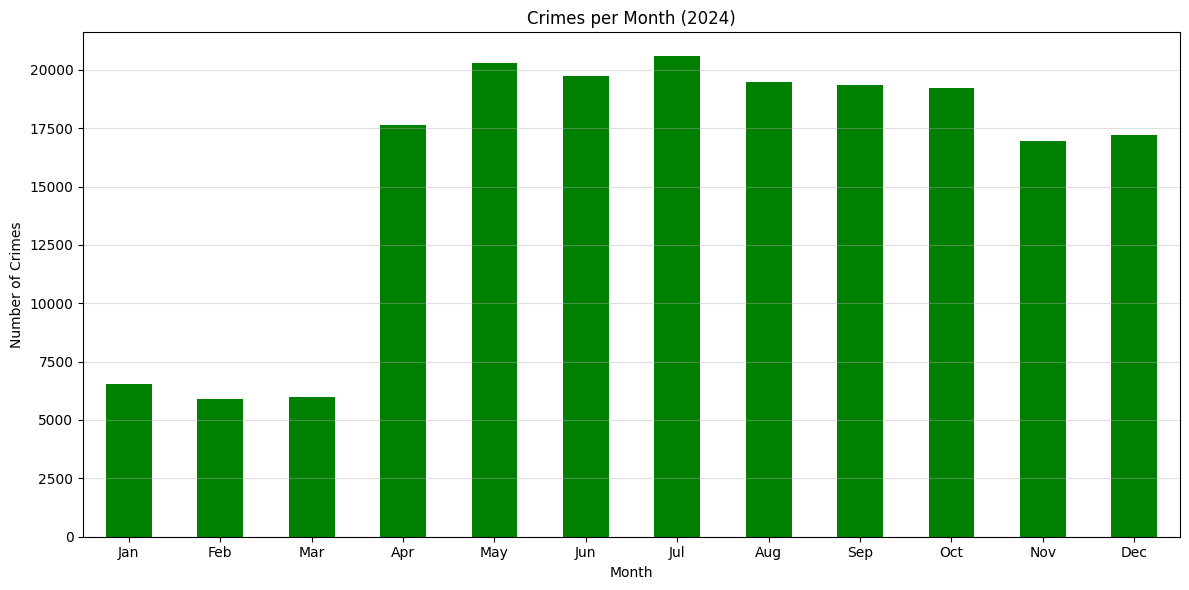

In [62]:
chicago['Date'] = pd.to_datetime(chicago['Date'], errors='coerce')

chicago_2024 = chicago[chicago['Date'].dt.year == 2024]

chicago_2024['Month'] = chicago_2024['Date'].dt.month

# number pf crimes per month
crimes_per_month_2024 = chicago_2024['Month'].value_counts().sort_index()

months = ['Jan','Feb','Mar','Apr','May','Jun',
          'Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize=(12,6))
crimes_per_month_2024.plot(
    kind='bar',
    color='green',
    title='Crimes per Month (2024)')

plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(ticks=range(12), labels=months, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()

<h3>INSIGHT 12:</h3>
The graph shows that the month of April had the highest number of crimes in Chicago in the year 2024. and the month of January was the month with the lowest number of crimes in the year 2024.

<h3>INSIGHT 13:</h3>
In Chicago the month of January is very cold, often with snow and icy conditions. People are less likely to go out, reducing opportunities for crimes like assaults, robberies, or street crimes. The month of April tends to be warmer, with more outdoor activity and social interaction, which might be the reason for the high number of crime opportunities.

<h2>13. What are the top 10 most common primary crime types?</h2>

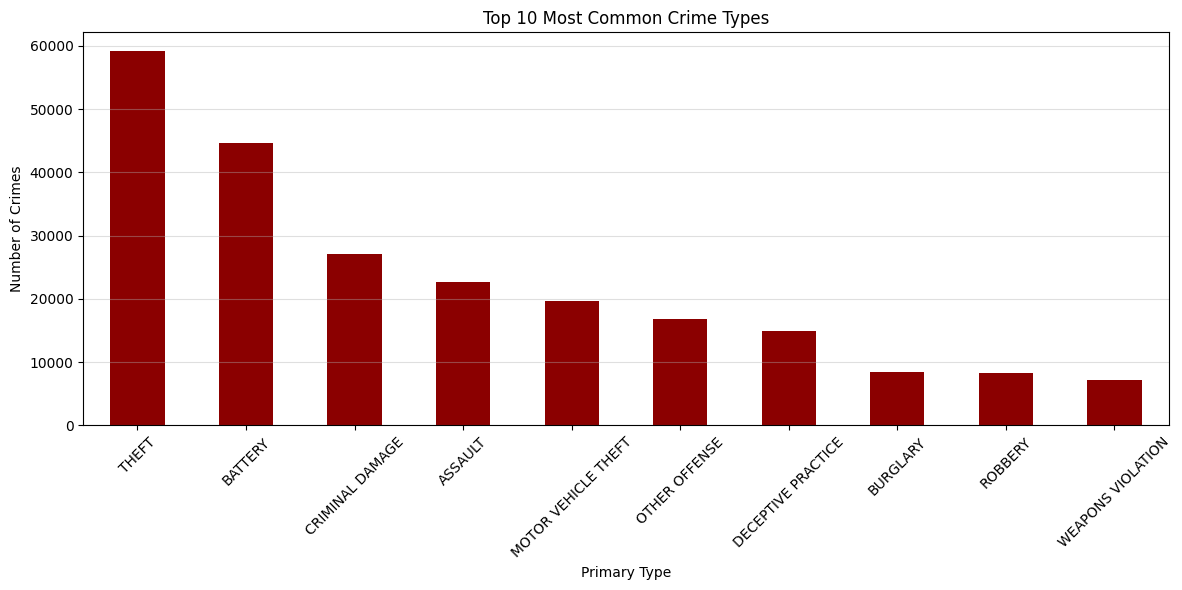

In [63]:
top10_primary = chicago['Primary Type'].value_counts().head(10)

plt.figure(figsize=(12,6))

top10_primary.plot(
    kind='bar',
    color='darkred')

plt.title("Top 10 Most Common Crime Types")
plt.xlabel("Primary Type")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()

<h3>INSIGHT 14:</h3>
The graph shows that the primary type of crime with the highest number of cases is theft, followed by battery. Chicago has crowded neighborhoods and busy commercial areas, which provide more opportunities for theft. Theft often occurs when valuables are easily accessible example parked cars, unattended belongings, shops.

<h3>INSIGHT 15:</h3>
Popular areas in Chicago are often visited by people for sightseeing, and this also increases the chances of theft (pickpocketing or shoplifting).

Battery often occurs during disputes, fights, or confrontations, which are more likely in areas with high social interaction. Bars, clubs, and parties can lead to altercations that result in battery

<h2>14. What is the distribution of all primary types</h2>

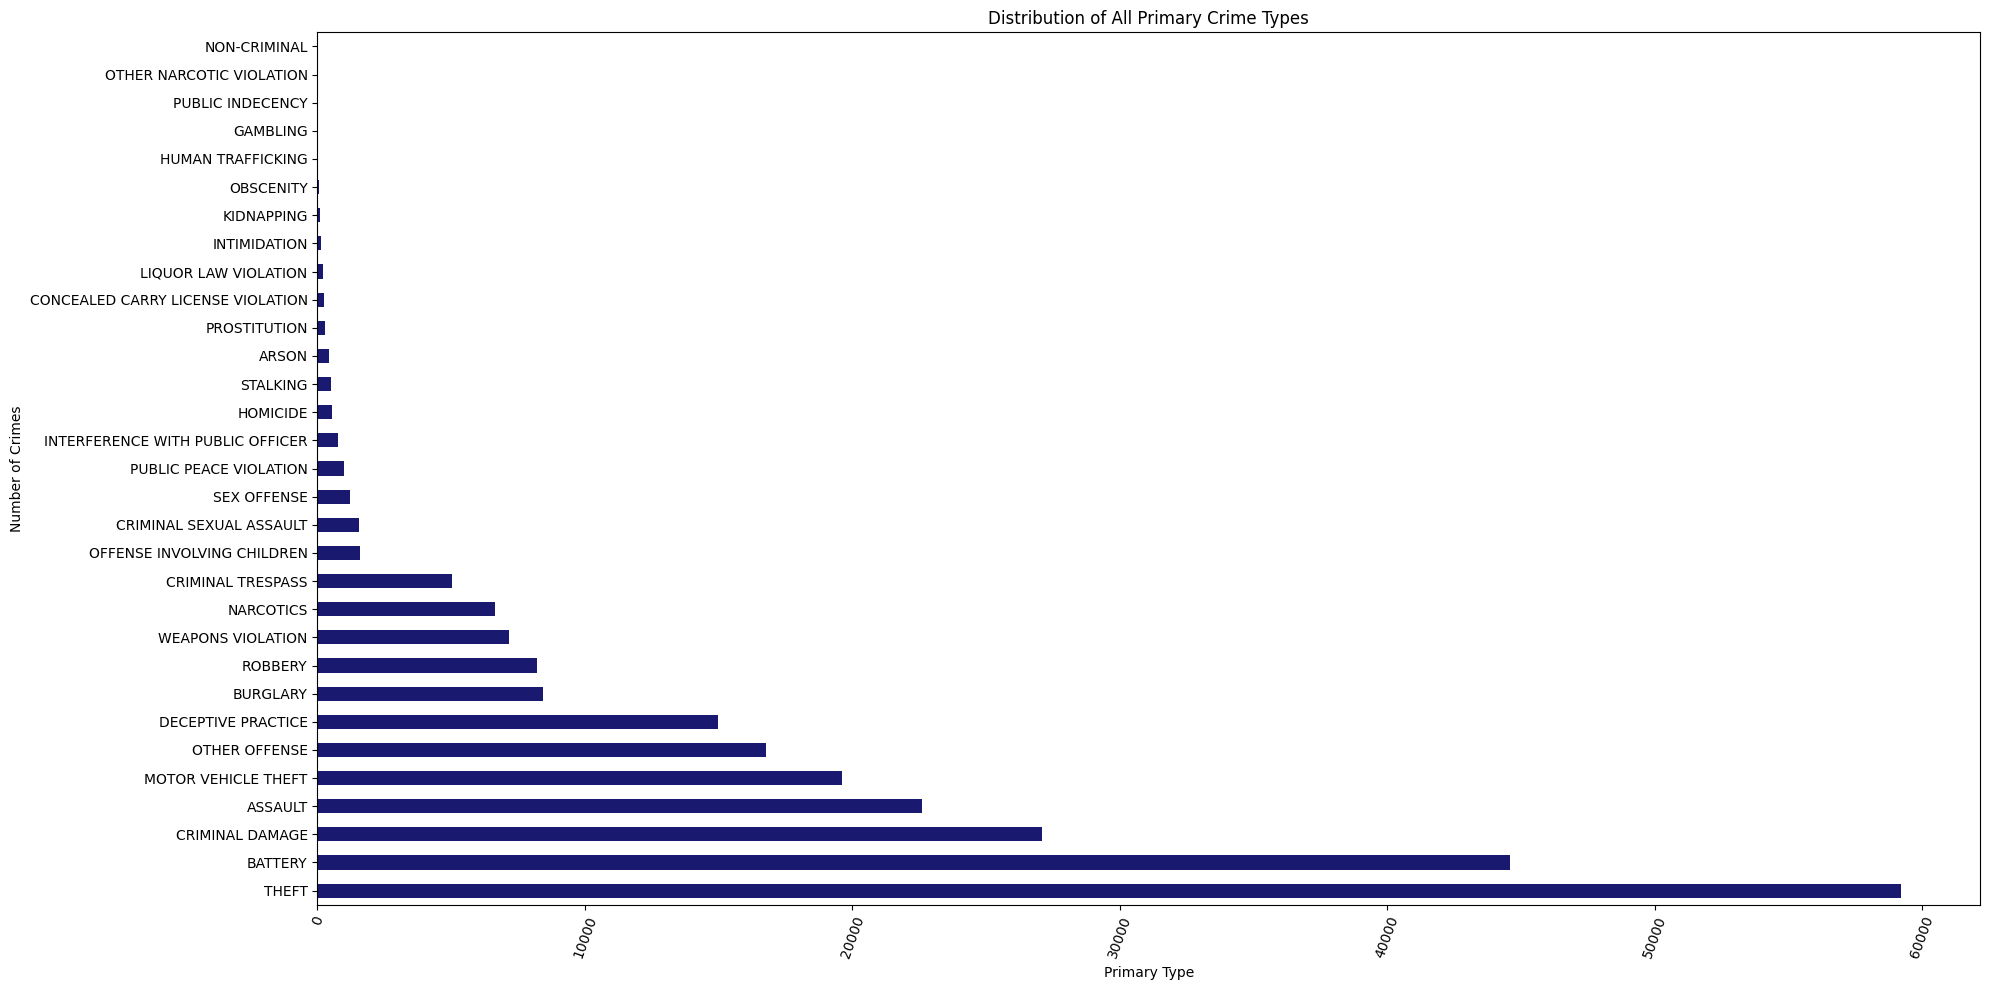

In [64]:
chicago['Primary Type'].value_counts().plot(
    kind='barh',
    color='midnightblue',
    figsize=(20,10),
)

plt.title("Distribution of All Primary Crime Types")
plt.xlabel("Primary Type")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

<h3>INSIGHT 16:</h3>
This graph shows the distribution of all primary crime types recorded in Chicago. The graph shows which crimes are most and least common.

The highest bars indicate the most frequent crimes like theft, battery, criminal damag, aasault, motor vehicle theft, robbery. These types of crimes dominate the city’s crime statistics.

<h3>INSIGHT 17:</h3>
Shorter bars represent rarer crimes, such as arson, kidnapping, gammbling, or bomb threats. These are uncommon but still important for law enforcement to monitor.

The graph shows that crime is not evenly distributed across types. A few crime types make up the majority of cases, while many others occur infrequently.

<h2>15. Which day the highest amd lowest number of crimes? </h2>

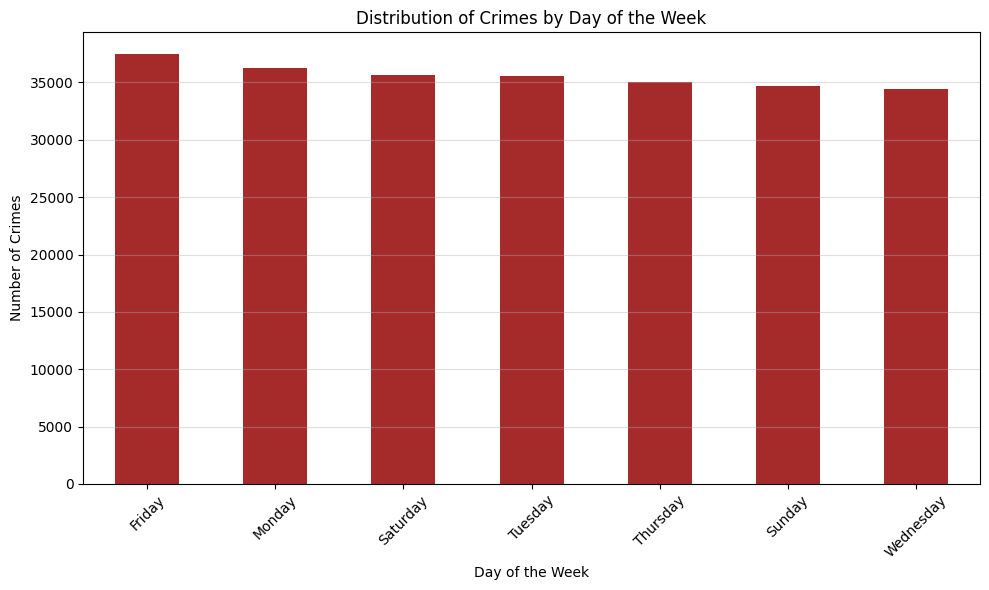

In [65]:
chicago['DayOfWeek'] = chicago['Date'].dt.day_name()

crimes_by_day = chicago['DayOfWeek'].value_counts()

crimes_by_day.plot(
    kind='bar',
    figsize=(10,6),
    color='brown'
)

plt.title("Distribution of Crimes by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()

<h3>INSIGHT 18:</h3>
The bar chart shows which days have the highest and lowest crime occurrences. Typically, weekends or certain weekdays might show spikes depending on social activity patterns.

<h2>16. Which crimes have the highest and lowest arrest rates?</h2>

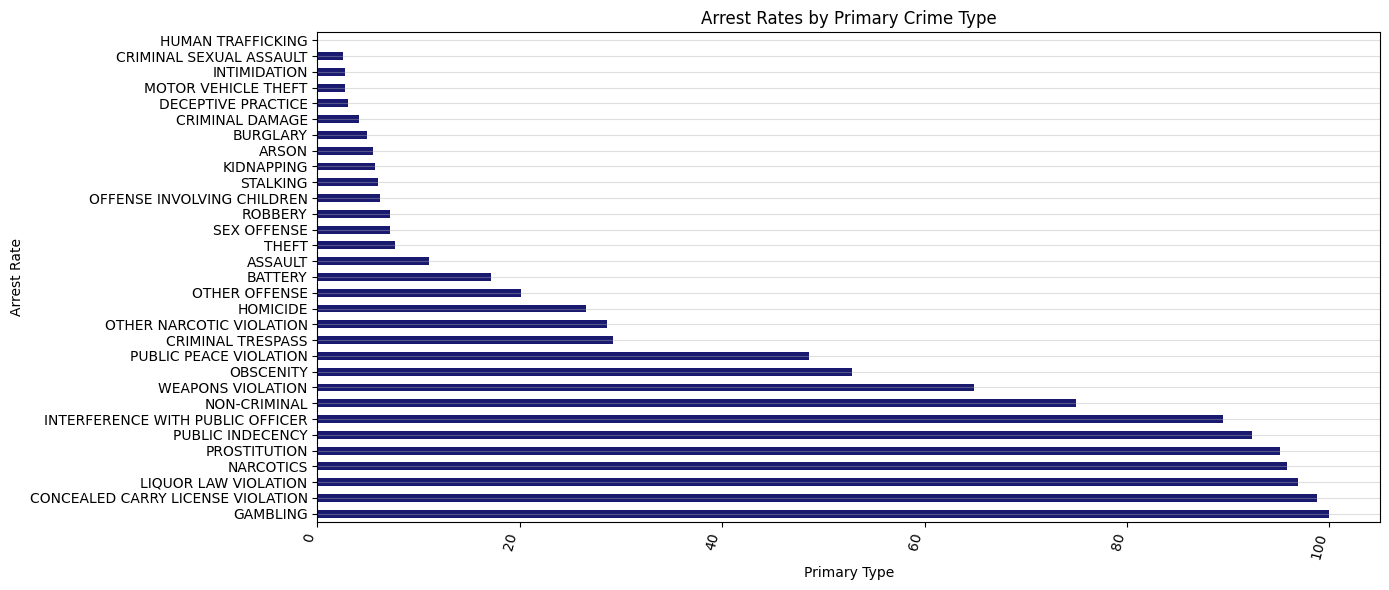

In [66]:
arrest_rate = chicago.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False) * 100

arrest_rate.plot(
    kind='barh',
    figsize=(14,6),
    color='midnightblue'
)

plt.title("Arrest Rates by Primary Crime Type")
plt.xlabel("Primary Type")
plt.ylabel("Arrest Rate")
plt.xticks(rotation=75, ha='right')
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()

<h3>INSIGHT 19:</h3>
The graph above shows that arrest rates by crime type. Some crimes have high arrest rates, while others have much lower rates, reflecting differences in how easily they can be investigated or prosecuted.

<h2>17. Which locations in Chicago report the highest proportion of theft crimes?</h2>

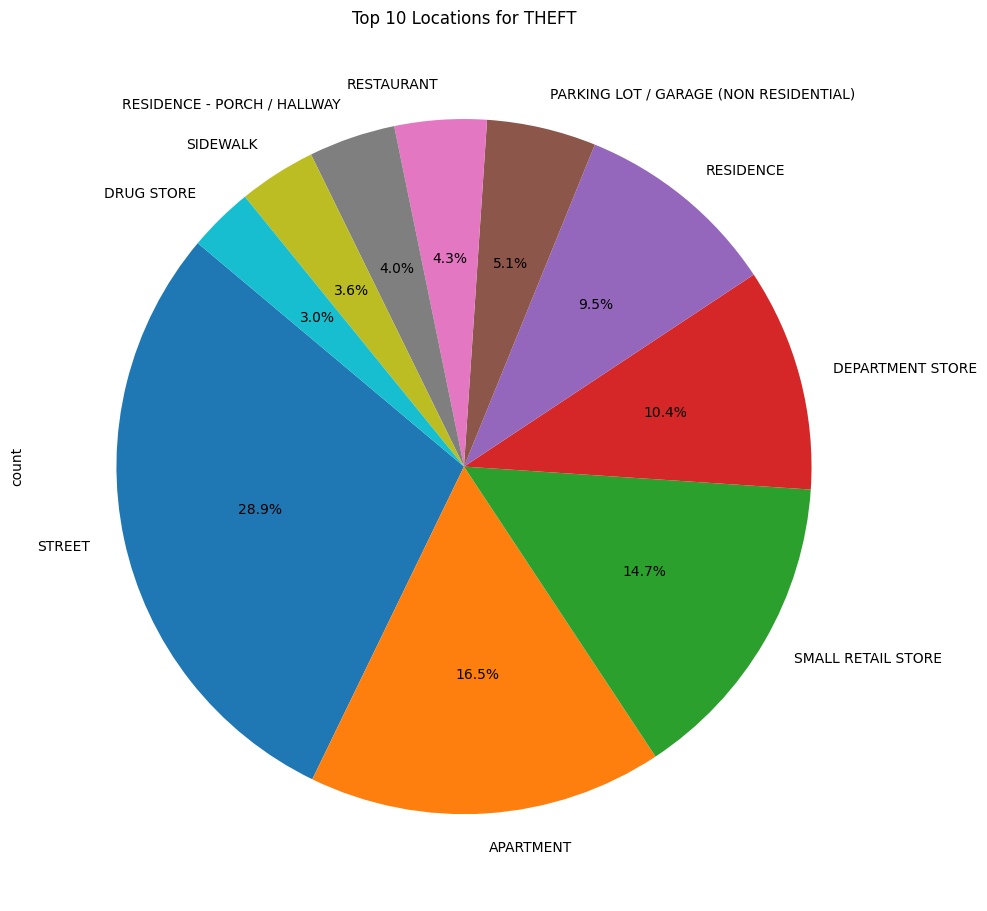

In [67]:
theft = chicago[chicago['Primary Type'] == 'THEFT']

theft_location = theft['Location Description'].value_counts().head(10)

theft_location.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(10,10),
    startangle=140
)

plt.title("Top 10 Locations for THEFT")
plt.tight_layout()
plt.show()

<h3>INSIGHT 20:</h3>
The pie above shows the top 10 locations indicate where thefts are most frequently reported, such as streets, parking lots, small retail store and so on.

Parking lots/garages appear as significant locations, pointing to vehicle-related theft like breaking into cars or stealing parts.

The largest portion of theft crimes occurs on streets, reflecting how open and accessible public spaces provide opportunities for offenders

<h2>18. What crime type is among the top 5 with the highest number of crimes in the year 2024-2025?</h2>

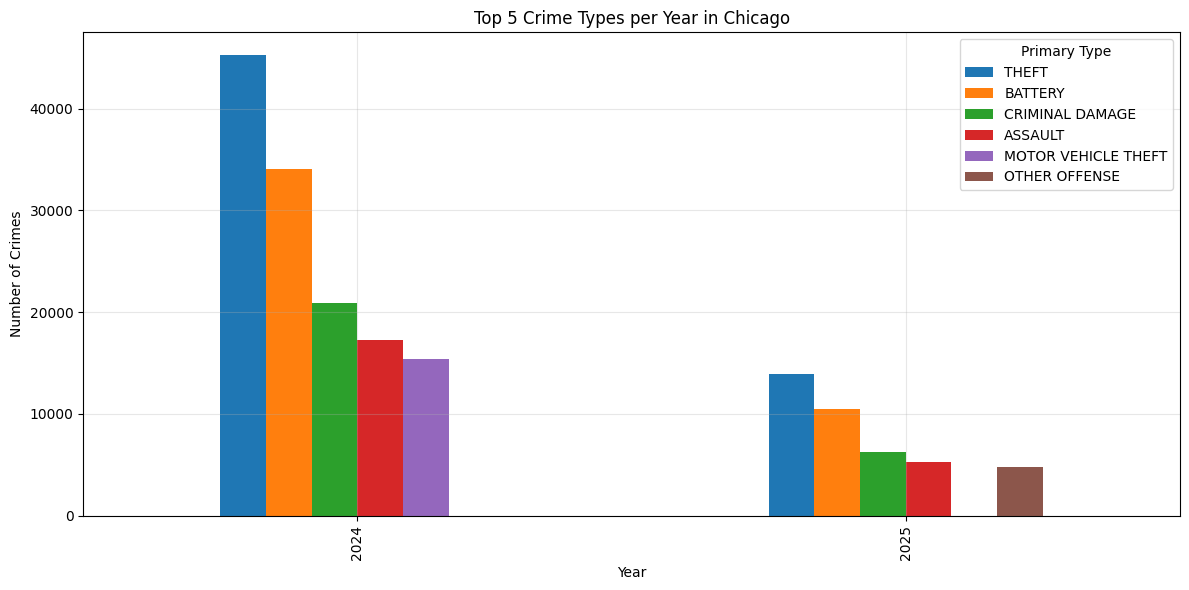

In [68]:
top5_per_year = chicago.groupby('Year')['Primary Type'].value_counts().groupby(level=0).head(5)

top5_df = top5_per_year.unstack(level=1, fill_value=0)

top5_df.plot(
    kind = 'bar',
    figsize=(12,6),
    title="Top 5 Crime Types per Year in Chicago"
)

plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(alpha=0.3)
plt.legend(title="Primary Type", loc='upper right')
plt.tight_layout()
plt.show()

<h3>INSIGHT 21:</h3>
The chart shows which crime types consistently appear in the top 5 each year, revealing persistent issues in the city, such as THEFT, BATTERY, CRIMINAL DAMAGE, ASSAULT, MOTOR VEHICLE THEFT and OTHER OFFENSES.

<h3>INSIGHT 22:</h3>
Understanding which crimes dominate the top 5 each year allows city authorities to design focused community outreach, awareness campaigns, or educational programs to address specific issues.

<h2>Q19. Top 15 Location with Most reported crimes.</h2>

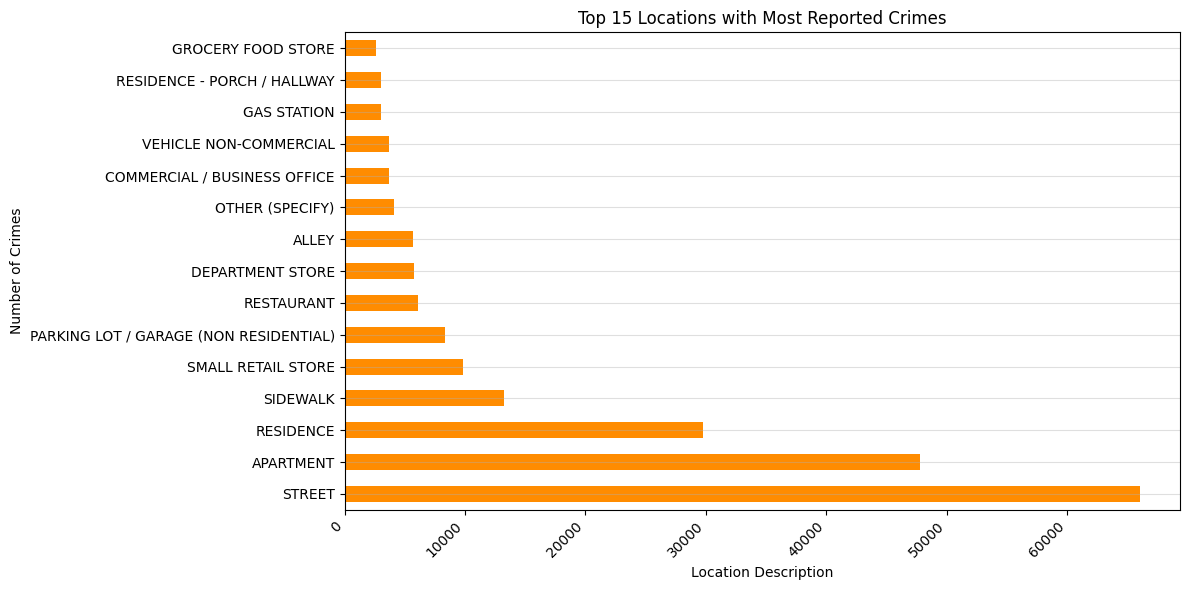

In [69]:
crimes_per_location = chicago['Location Description'].value_counts().head(15)  # top 15 locations

crimes_per_location.plot(
    kind='barh', 
    color='darkorange',
    figsize=(12,6)
)

plt.title("Top 15 Locations with Most Reported Crimes")
plt.xlabel("Location Description")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()

<h3>INSIGHT 23:</h3>
The bar graph above shows the top 15 locations represent hotspots where crimes occur most frequently, helping identify areas that need attention.

The graph may show that crimes are more frequent in public/open spaces compared to private or institutional locations, highlighting where policing can be more effective.

<h3>INSIGHT 24:</h3>
Locations like streets, alleys, or parking lots show that many crimes are opportunistic, taking advantage of accessible, poorly monitored spaces.
Locations with high crime counts may benefit from preventive interventions such as security patrols, improved lighting, or community watch programs.

<h2>20. Which locations in Chicago have the highest number of reported homicides according to the dataset?</h2>

Location Description
STREET           279
APARTMENT         73
ALLEY             43
HOUSE             29
PARKING LOT       19
PARK PROPERTY     14
YARD              14
AUTO              11
GAS STATION       10
PORCH              9
Name: count, dtype: Int64


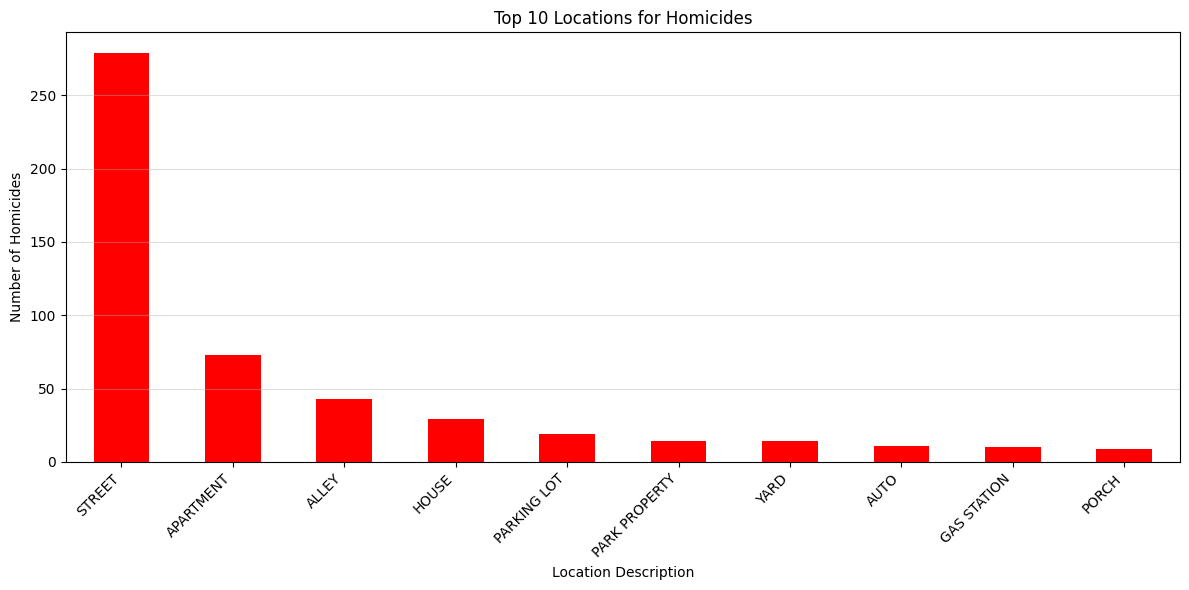

In [70]:
homicide = chicago[chicago['Primary Type'] == 'HOMICIDE']

homicide_location = homicide['Location Description'].value_counts().head(10)

print(homicide_location)

plt.figure(figsize=(12,6))
homicide_location.plot(
    kind='bar', 
    color='red'
)

plt.title("Top 10 Locations for Homicides")
plt.xlabel("Location Description")
plt.ylabel("Number of Homicides")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()

<h3>INSIGHT 25:</h3>
The result above shows the top 10 locations reveal areas where homicides are most frequently reported, highlighting places of heightened danger.
Many homicides may occur on streets or alleys, suggesting that public outdoor spaces are particularly susceptible to violent crime.

<h3>INSIGHT 26:</h3>
The data can guide city authorities in implementing safety improvements such as better lighting, security cameras, and public awareness programs.
Tracking the top homicide locations over time helps identify trends, recurring hotspots, and emerging areas of concern.

<h2>21. Crimes per Hour</h2>

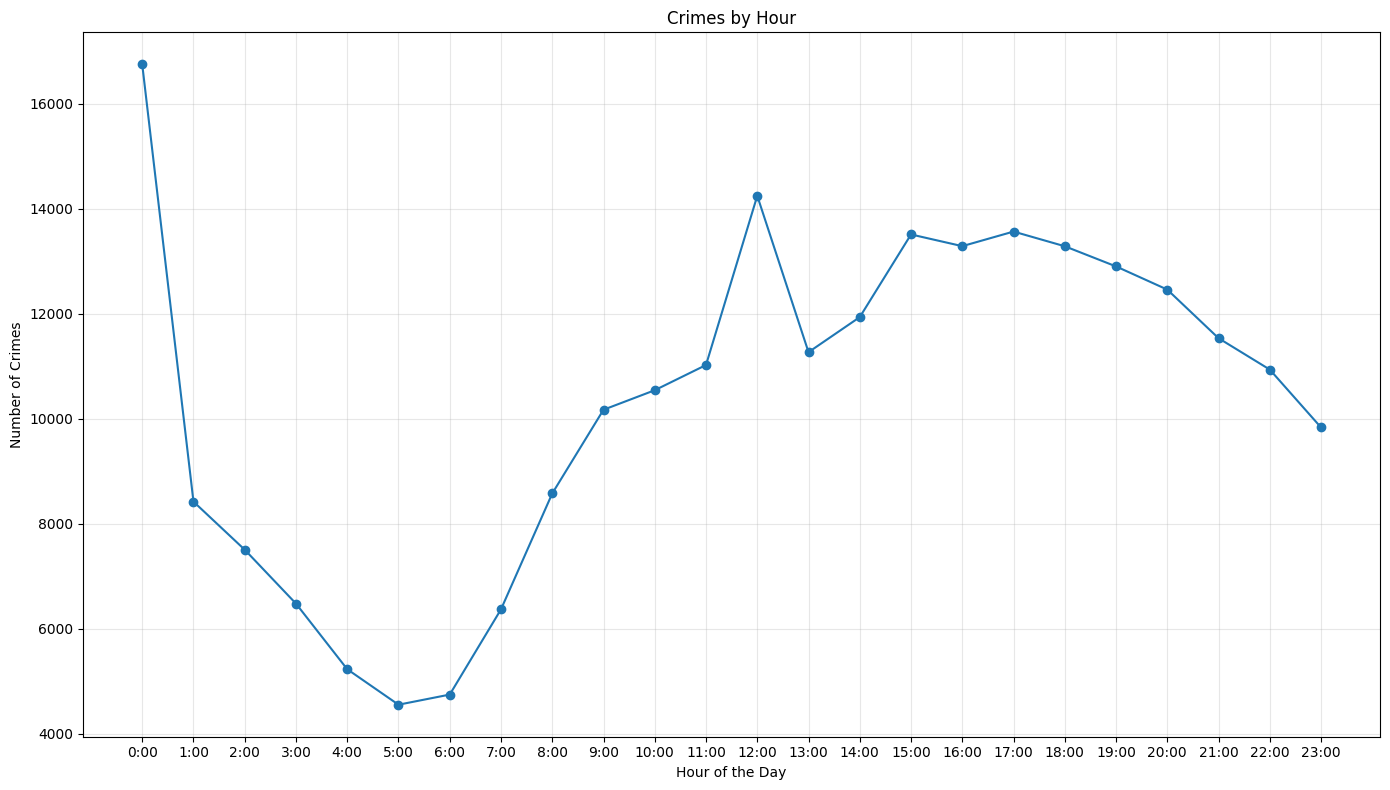

In [71]:
hour = chicago['Hour'].value_counts().sort_index()

hour.plot(kind="line", 
          marker="o",
          figsize=(14,8)
)

plt.title("Crimes by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Crimes")

plt.xticks(ticks=range(0,24), labels=[f"{h}:00" for h in range(0,24)])

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<h3>INSIGHT 27:</h3>
Crimes tend to spike during late-night hours like 10 PM–2 AM, likely due to fewer people in public spaces and less supervision. Some crimes also occur during business hours like 10 AM–6 PM, often linked to thefts or opportunistic crimes in busy areas. Early morning hours like 4 AM–6 AM and mid-morning may have fewer crimes, suggesting relatively safer periods.

<h2>22. Which FBI Codes are most frequently recorded in the Chicago crime dataset?</h2>

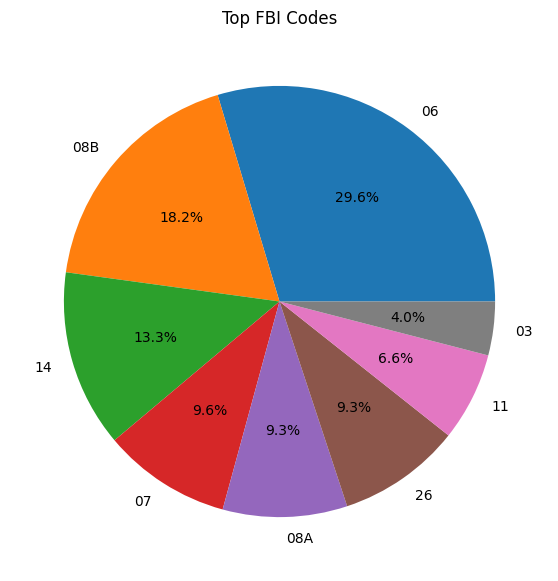

In [72]:
fbi_counts = chicago['FBI Code'].value_counts().head(8)

fbi_counts.plot(
    kind="pie", 
    autopct='%1.1f%%', 
    figsize=(7,7), 
    title="Top FBI Codes"
    
)
plt.ylabel("")
plt.show()

<h3>INSIGHT 28:</h3>
The pie chart highlights the few FBI Codes that account for the majority of crimes in the dataset.

<h1>DATA VISUALIZATION USING FOLIUM HEATMAP</h1>

<h2>23. The Areas in Chicago have the highest concentration of BATTERY crimes</h2>

In [85]:
import folium
from folium.plugins import HeatMap

battery = chicago[chicago['Primary Type'] == 'BATTERY'].dropna(subset=['Latitude', 'Longitude'])

m_battery = folium.Map(location=[battery['Latitude'].mean(), battery['Longitude'].mean()],zoom_start=11)

HeatMap(battery[['Latitude', 'Longitude']], radius=12, blur=8, max_zoom=12).add_to(m_battery)

m_battery


<h3>INSIGHT 29:</h3>
The heatmap shows the areas with the highest frequency of BATTERY crimes, with most incidents occurring on streets. This indicates that public outdoor spaces are the primary locations for such offenses, highlighting the need for increased safety measures and policing in these areas.

<h2>24. The areas in Chicago experience the highest concentration of ROBBERY crimes</h2>

In [74]:
robbery_data = chicago[chicago['Primary Type'] == 'ROBBERY']

locations = list(zip(robbery_data['Latitude'], robbery_data['Longitude']))

m_robbery = folium.Map(
    location=[robbery_data['Latitude'].mean(), robbery_data['Longitude'].mean()],
    zoom_start=11
)

HeatMap(locations, radius=8, blur=6, max_zoom=12).add_to(m_robbery)
m_robbery


<h3>INSIGHT 30:</h3>
The heatmap shows clusters of high robbery activity, revealing neighborhoods or blocks where robberies are most frequent.

Many robberies occur on streets, sidewalks, or public spaces, suggesting that outdoor areas are higher-risk locations.

<h2>25. Areas in Chicago have the highest concentration of STALKING crimes</h2>

In [96]:
stalking = chicago[chicago['Primary Type'] == 'STALKING']
stalking = stalking.dropna(subset=['Latitude', 'Longitude'])
block_counts = stalking.groupby([ 'Latitude', 'Longitude']).size().reset_index(name='Count')

top_blocks = block_counts.sort_values(by='Count', ascending=False).head(20)

m_stalking = folium.Map(
    location=[stalking['Latitude'].mean(), stalking['Longitude'].mean()],
    zoom_start=11
)

heat_data = [[row['Latitude'], row['Longitude'], row['Count']] for _, row in top_blocks.iterrows()]
HeatMap(heat_data, radius=12, blur=8, max_zoom=12).add_to(m_stalking)

m_stalking.save("Stalking_Crimes.html")
m_stalking  

<h3>INSIGHT 31:</h3>
The heatmap shows locations with the highest number of stalking incidents, helping law enforcement identify high-risk areas.

Many stalking crimes are likely occurring in public spaces such as streets, sidewalks, and parks.

<h2>26. Areas in Chicago experience the highest concentration of MOTOR VEHICLE THEFT incidents</h2>

In [95]:
mv_theft = chicago[chicago['Primary Type'] == 'MOTOR VEHICLE THEFT']
mv_theft = mv_theft.dropna(subset=['Latitude', 'Longitude'])

block_counts = mv_theft.groupby([ 'Latitude', 'Longitude']).size().reset_index(name='Count')

top_blocks = block_counts.sort_values(by='Count', ascending=False).head(20)

m_mv_theft = folium.Map(location=[mv_theft['Latitude'].mean(), mv_theft['Longitude'].mean()],zoom_start=11)

heat_data = [[row['Latitude'], row['Longitude'], row['Count']] for _, row in top_blocks.iterrows()]
HeatMap(heat_data, radius=12, blur=8, max_zoom=12).add_to(m_mv_theft)

m_mv_theft.save("Motor_Vehicle_Theft.html")
m_mv_theft

<h3>INSIGHT 32:</h3>
The heatmap highlights blocks with the highest number of motor vehicle thefts, helping to identify high-risk areas in the city.

Many thefts occur in public spaces such as streets, parking lots, and open areas, indicating a need for increased security in these locations.

<h2>27. Street areas in Chicago have the highest number of arrests</h2>

In [97]:
street_arrests = chicago[(chicago['Arrest'] == True) &  (chicago['Location Description'] == 'STREET')]
street_arrests = street_arrests.dropna(subset=['Latitude', 'Longitude'])

m_street_arrest = folium.Map(
    location=[street_arrests['Latitude'].mean(), street_arrests['Longitude'].mean()],
    zoom_start=11
)

HeatMap(street_arrests[['Latitude', 'Longitude']], radius=10, blur=8, max_zoom=12).add_to(m_street_arrest)

m_street_arrest.save("Street_Arrest.html")
m_street_arrest


<h3>INSIGHT 33:</h3>
The map shows streets where the most arrests happen, highlighting areas with more crime or police activity.
Many arrests on streets are likely for crimes like theft, assault, or fights in public areas.

<h2>28. Areas in Chicago experience the highest frequency of kidnapping incidents according to the dataset</h2>

In [98]:
kidnapping = chicago[chicago['Primary Type'] == 'KIDNAPPING'].dropna(subset=['Latitude', 'Longitude'])

m_kidnapping = folium.Map(
    location=[kidnapping['Latitude'].mean(), kidnapping['Longitude'].mean()],
    zoom_start=11
)

HeatMap(kidnapping[['Latitude', 'Longitude']], radius=12, blur=8, max_zoom=12).add_to(m_kidnapping)

m_kidnapping.save("Kidnapping_crimes.html")
m_kidnapping


<h3>INSIGHT 34:</h3>
The heatmap reveals concentrated hotspots, showing that kidnappings are not evenly distributed across the city but tend to occur in specific neighborhoods.

Areas with high population density or commercial activity may show more incidents, indicating potential risk zones.

The visualization highlights the importance of targeted law enforcement and community awareness programs in these high-risk areas.

Comparing this heatmap with other crime types could reveal whether kidnappings correlate with other serious crimes, helping to prioritize preventive measures.

<h2>29. Which areas in Chicago report the highest number of non-criminal incidents ?</h2>

In [99]:
non_criminal = chicago[chicago['Primary Type'] == 'NON-CRIMINAL'].dropna(subset=['Latitude', 'Longitude'])

m_non_criminal = folium.Map(location=[non_criminal['Latitude'].mean(), non_criminal['Longitude'].mean()],zoom_start=11)

HeatMap(non_criminal[['Latitude', 'Longitude']], radius=12, blur=8, max_zoom=12).add_to(m_non_criminal)

m_non_criminal.save("Non_Criminal_areas.html")
m_non_criminal

<h3>INSIGHT 35:</h3>
The heatmap shows that non-criminal incidents are concentrated in certain neighborhoods, indicating areas with frequent administrative or service-related reports. Hotspots might correspond to busy commercial zones, public spaces, or high-traffic streets where citizens often report non-criminal issues.

Non-criminal areas tend to be safer compared to other areas with frequent criminal activity. The concentration of non-criminal incidents on the heatmap suggests that these neighborhoods experience fewer serious crimes, making them relatively safer and more orderly.

<h2>30. Some alleys in Chicago have homicide incidents</h2>

In [100]:
homicide_alley = chicago[(chicago['Primary Type'] == 'HOMICIDE') &(chicago['Location Description'] == 'ALLEY')].dropna(subset=['Latitude', 'Longitude'])

m_homicide_alley = folium.Map(location=[homicide_alley['Latitude'].mean(), homicide_alley['Longitude'].mean()],zoom_start=11)

HeatMap(homicide_alley[['Latitude', 'Longitude']], radius=12, blur=8, max_zoom=12).add_to(m_homicide_alley)

m_homicide_alley.save("Homicide_in_alley.html")
m_homicide_alley


<h3>INSIGHT 36:</h3>
Homicides occurring in alleys are relatively rare compared to other types of crimes, indicating that while alleys can be dangerous, most criminal activity tends to happen in more common public spaces like streets, residences, or commercial areas.